Работаем с OpenCV

In [39]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [40]:
from platform import python_version
print(python_version())

3.7.14


In [41]:
image = cv2.imread('Lenna.png')  # чтение файлв в массив numpy

In [42]:
image.shape

(512, 512, 3)

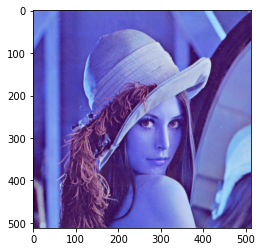

In [43]:
plt.imshow(image) #формат BRG

In [44]:
image = np.flip(image, 2)
# команда cv читает файл в формате BRG - преобразуем каналы в RGB
#(цифра 2 - если 0 или 1 просто перевернет изображение)

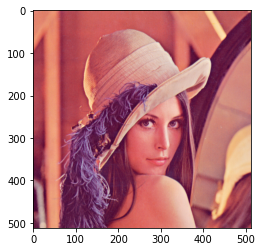

In [45]:
plt.imshow(image)

In [46]:
image = np.flip(image, 1)

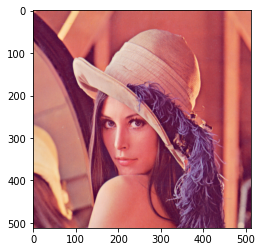

In [47]:
plt.imshow(image)

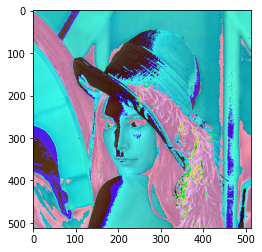

In [48]:
plt.imshow(image+100) # попытка увеличить яркость просто прибавлением - перескакиваем 256 канал и у нас искажение

In [49]:
image = np.clip((image.astype(np.int32) + 100), 0, 255).astype(np.uint8)
# перезаписать значение в 32-битовом формате, прибавить 100, а затем вернуться к восьми битам

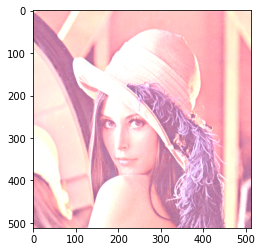

In [50]:
plt.imshow(image) 

Для аугментации изображения применяем  пакет albumentations.

In [51]:
!pip install albumentations

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [52]:
import albumentations as A

In [53]:
transform = A.Compose([
    A.RandomCrop(width=256, height=256),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
])

In [54]:
transformed_image = transform(image=image)['image'] 

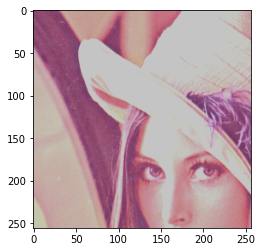

In [55]:
plt.imshow(transformed_image) 

In [56]:
image = np.clip((image.astype(np.int32) - 100), 0, 255).astype(np.uint8)

In [57]:
transformed_image1 = transform(image=image)['image'] 

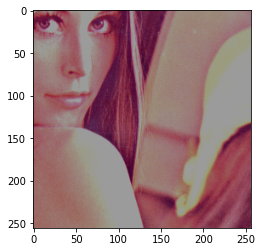

In [58]:
plt.imshow(transformed_image1) 